https://github.com/GorkemKola/Bitcoin-Price-Prediction/blob/main/BitcoinPricePrediction/BitcoinPricePrediction.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.metrics import accuracy_score

In [51]:
def metric(true, predict):
  #RMSE
  print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(true, predict)))
  #MAPE
  print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(true,predict)*100)
  # r2
  print("r2 score:", r2_score(true,predict))
  print()

def plot(true, predict, date):
    D = pd.DataFrame()
    D['Date'] = date
    D['Obs'] = true
    D['Sim'] = predict
    D = D.sort_values('Date').reset_index().drop(columns = 'index')

    fig = plt.figure(figsize = (20,10))
    plt.plot(D['Date'], D['Obs'].values, label = 'Actual', linewidth=3)
    plt.plot(D['Date'], D['Sim'], color = 'orange' , label = 'Prediction', linewidth=3)
    plt.legend(fontsize=25)
    plt.xticks(fontsize = 30)
    plt.yticks(fontsize =30)
    # plt.savefig(path)
    plt.show()

# **1. Data Preprocessing**

In [82]:
# url = 'https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv'
# url = '.\data\data_preparation\data_preparation.csv'
url = '../data/data_preparation/data_preparation.csv'
df = pd.read_csv(url, sep = ',')

In [53]:
df

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2023-11-03,1993.5,2011.9,1989.3,1999.2,3.6815,80.51,105.02,1.0732,497.76,13478.28,71.36,944.3,1760.71,23.285,4358.34,14.91
1,2023-11-02,1992.0,1999.2,1986.3,1993.5,3.6725,82.46,106.12,1.0622,487.02,13294.19,72.14,930.6,1714.21,22.846,4317.78,15.66
2,2023-11-01,1993.3,2005.9,1978.2,1987.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87
3,2023-10-31,2005.6,2017.7,1987.4,1994.3,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
4,2023-10-30,2013.5,2016.8,1999.7,2005.6,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
3419,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
3420,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3421,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02


In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df = df.sort_values('Date').reset_index().drop(columns = 'index')

In [56]:
df.head()

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2010-04-01,1114.6,1129.1,1112.3,1126.1,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47
1,2010-04-05,1122.0,1134.3,1120.8,1133.8,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
2,2010-04-06,1131.9,1139.6,1123.5,1136.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3,2010-04-07,1135.2,1154.2,1133.3,1153.0,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
4,2010-04-08,1150.2,1154.7,1144.4,1152.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48


#### **1.1. Shifting**

In [57]:
df['GOLD_close'] = df["GOLD_close"][1:].reset_index(drop=True)
df = df.dropna()

In [58]:
df

,Date,GOLD_open,GOLD_high,GOLD_low,GOLD_close,copper,crude_oil,DXY,EURUSD,MSCI,NASDAQ,NLR,platinum,RUT,silver,SP500,VIX
0,2010-04-01,1114.6,1129.1,1112.3,1133.8,3.5840,84.87,80.78,1.3590,36.47,2402.58,69.45,1675.6,683.98,17.890,1178.10,17.47
1,2010-04-05,1122.0,1134.3,1120.8,1136.0,3.6315,86.62,81.09,1.3487,36.98,2429.53,70.44,1709.8,697.65,18.118,1187.44,17.02
2,2010-04-06,1131.9,1139.6,1123.5,1153.0,3.6170,86.84,81.39,1.3400,37.37,2436.81,70.59,1704.5,701.48,17.931,1189.44,16.23
3,2010-04-07,1135.2,1154.2,1133.3,1152.9,3.5975,85.88,81.44,1.3345,37.31,2431.16,69.75,1723.2,699.46,18.199,1182.45,16.62
4,2010-04-08,1150.2,1154.7,1144.4,1161.9,3.5865,85.39,81.53,1.3361,36.19,2436.81,69.42,1717.1,699.64,18.127,1186.44,16.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,2023-10-27,1995.0,2019.7,1986.4,2005.6,3.6460,85.54,106.56,1.0564,476.19,12643.01,67.28,905.8,1636.94,22.887,4117.37,21.27
3418,2023-10-30,2013.5,2016.8,1999.7,1994.3,3.6585,82.31,106.12,1.0617,481.99,12789.48,68.35,939.9,1647.29,23.396,4166.82,19.75
3419,2023-10-31,2005.6,2017.7,1987.4,1987.5,3.6490,81.02,106.66,1.0578,471.55,12851.24,69.93,944.9,1662.28,22.952,4193.80,18.14
3420,2023-11-01,1993.3,2005.9,1978.2,1993.5,3.6490,80.44,106.88,1.0570,471.85,13061.47,70.98,930.4,1669.70,22.790,4237.86,16.87


### **1.2. Feature Selection**


from Random Forest model, we have 3 important features:
'BTC_high', 'BTC_low', 'BTC_open'

In [59]:
top = ['GOLD_high', 'GOLD_low', 'GOLD_open']
columns = df.columns
drop_columns = []
for column in columns:
  if column not in top:
    drop_columns.append(column)
df3 = df.drop(columns = drop_columns)

In [60]:
df3['GOLD_close'] = df['GOLD_close']
df3['Date'] = df['Date']

In [61]:
df = df3.copy()

### **1.3. Normalization**

- a process that important in KNN - an algorithm that prediction based on calculating distance between data points.
- normalization: change all units and magnitudes to only one range to avoid bias to any features.
- In my programming, I choose MinMaxScaling method to normalize the data.

- formulas of Min Max Scaling: x_normalized = (x - min(x)) / (max(x) - min(x)
> scale data to a fixed range, between 0 and 1

In [62]:
scaler = MinMaxScaler()
df1 = df.drop("Date", axis = 1, inplace = False).drop("GOLD_close", axis = 1, inplace = False)
X = df1.copy()
scaled = scaler.fit_transform(X)
display(scaled)

array([[0.06156698, 0.06468583, 0.06666002],
       [0.0687872 , 0.06975158, 0.07512953],
       [0.07844668, 0.07491476, 0.07781985],
       ...,
       [0.93092009, 0.93034584, 0.93862096],
       [0.91891892, 0.91885046, 0.92945397],
       [0.9176505 , 0.91232343, 0.93752491]])

### **1.4. Split data**

In [63]:
# 70/15/15
Y = pd.DataFrame()
Y = df['GOLD_close']
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=15/85, random_state=0, shuffle=False)
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)
train_date, valid_date = train_test_split(train_date, test_size=15/85, random_state=0,shuffle=False)
Y_valid = np.array(Y_valid)
X_valid = np.array(X_valid)
Y_test = np.array(Y_test)
X_test = np.array(X_test)

In [64]:
print("x_train:",X_train.shape), print("y_train: ",Y_train.shape)
print("x_valid: ",X_valid.shape), print("y_valid: ",Y_valid.shape)
print("x_test: ",X_test.shape), print("y_test: ",Y_test.shape)

x_train: (2394, 3)
y_train:  (2394,)
x_valid:  (514, 3)
y_valid:  (514,)
x_test:  (514, 3)
y_test:  (514,)


(None, None)

# **2. Default**

In [65]:
neighbors = KNN()
neighbors.fit(X_train, Y_train)

KNeighborsRegressor()

##### **2.1. Train set**

Metric:
Root Mean Square Error (RMSE): 12.67581457031009
Mean Absolute Percentage Error (MAPE): 0.6609492691181011
r2 score: 0.9949492725590743

Visualization:


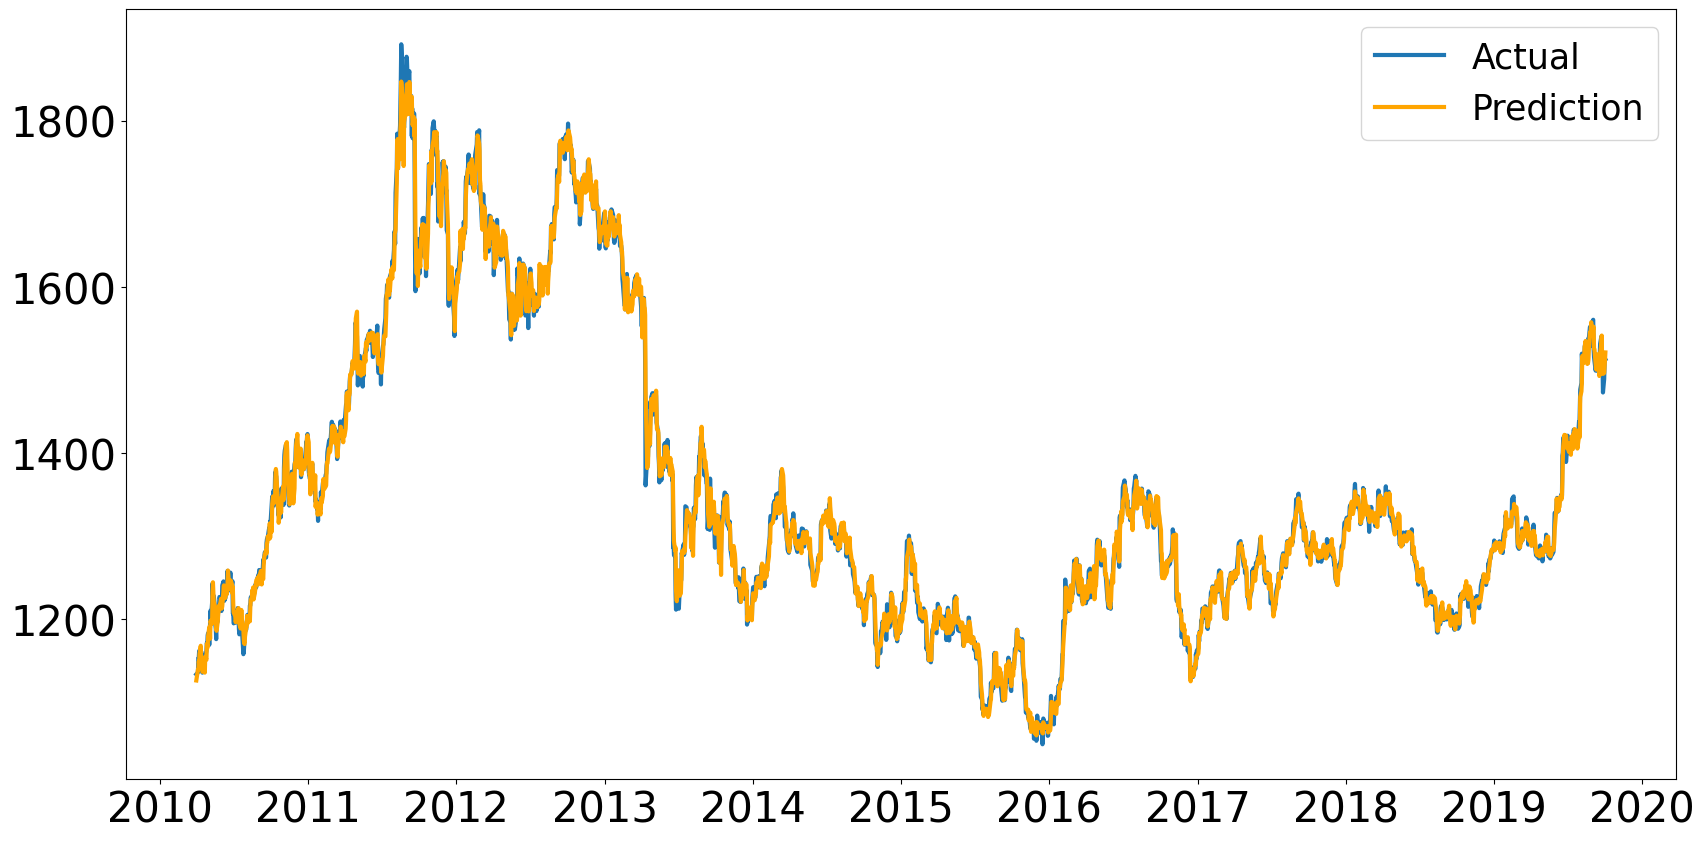

In [66]:
true_train = Y_train.copy()
prediction_train = neighbors.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

##### **2.2. Valid set**

Metric:
Root Mean Square Error (RMSE): 53.55976912275192
Mean Absolute Percentage Error (MAPE): 1.8468358328710879
r2 score: 0.858973540372511

Visualization:


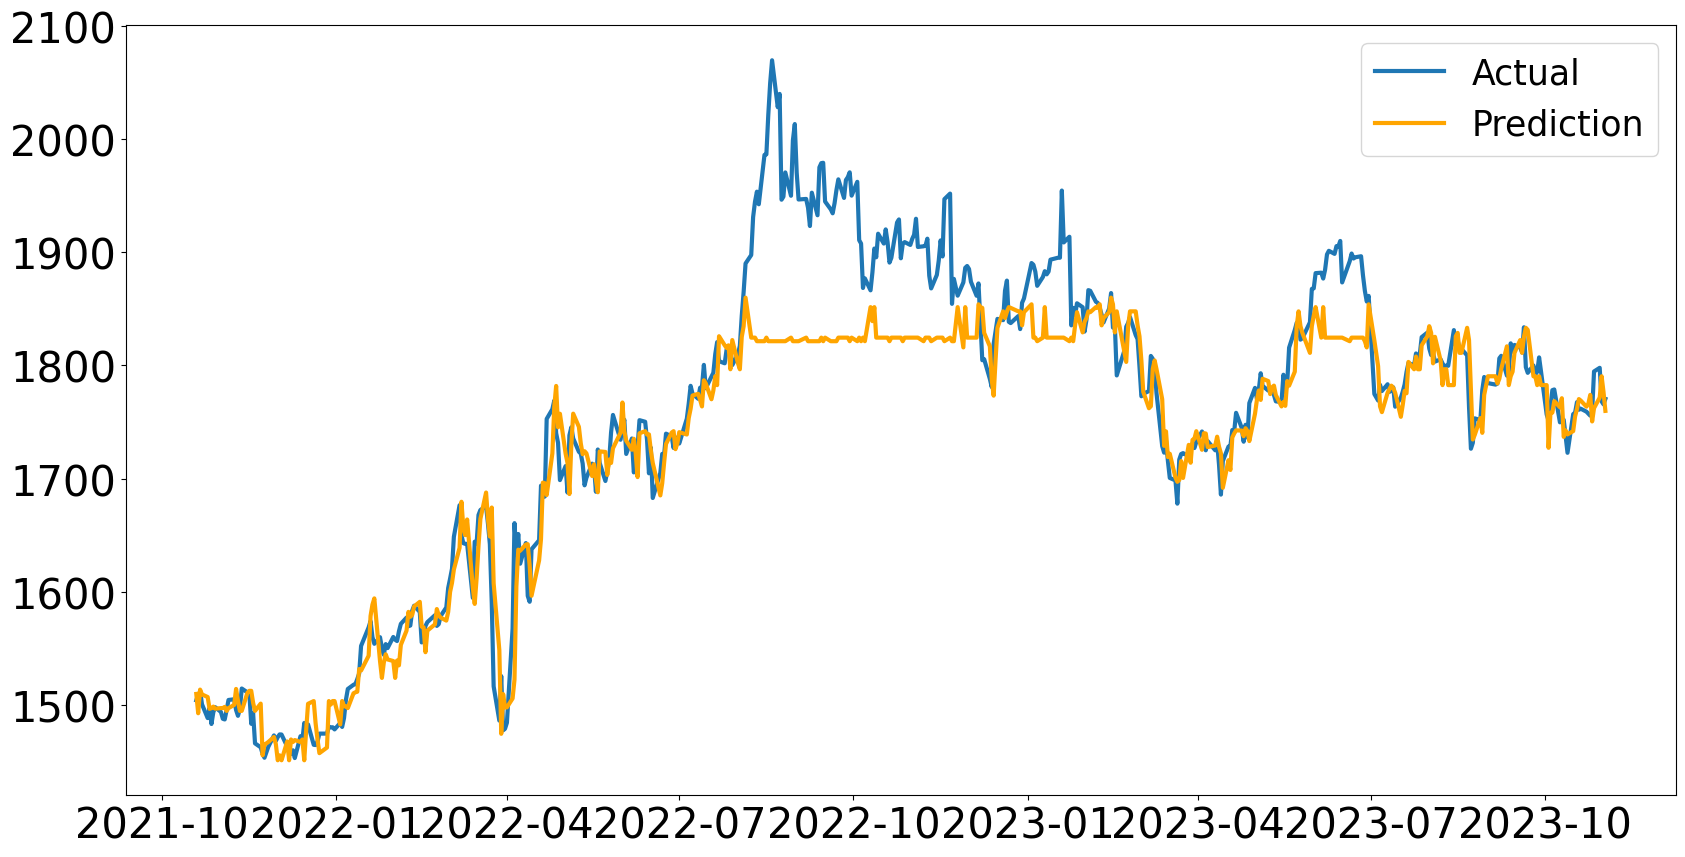

In [67]:
true_test = Y_valid.copy()
prediction_test = neighbors.predict(X_valid)

print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **3. Hyperparameters tuning**

- Two hyperparameters are tuned: `n_neighbors`, which is the number of neighbors to use, and `p`, which determines the type of geometric distance used. I use (1,40) as the range of potential value for `n_neighbors`; [1,2] as potential value for `p`.
- GridSearchCV with TimeSeriesSplit(n_splits = 3) is used as an evaluation strategy to find the best model on the validation set.


### **3.1. Grid Search**

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://scikit-learn.org/stable/modules/grid_search.html

scoring: https://scikit-learn.org/stable/modules/model_evaluation.html

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': list(range(1,40)),
    'p': [1, 2],
    }

# Create the kNN regressor
knn = KNeighborsRegressor()

tscv = TimeSeriesSplit(n_splits=3)
# Perform grid search to find the best parameters
grid_search = GridSearchCV(knn,
                           param_grid,
                           scoring= 'neg_mean_squared_error', # metric
                           cv=tscv, # 5-fold cross validation
                           )
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='neg_mean_squared_error')

In [69]:
# Assume you have performed Grid Search and stored the results in grid_search_result

# Get the top 2 models based on mean_test_score
top_2_indices = np.argsort(grid_search.cv_results_['mean_test_score'])[-2:]

# Print the details of the top 2 models
for index in top_2_indices:
    params = grid_search.cv_results_['params'][index]
    mean_test_score = grid_search.cv_results_['mean_test_score'][index]
    std_test_score = grid_search.cv_results_['std_test_score'][index]
    print(f"Model: {params}")
    print(f"Mean Valid Score: {mean_test_score:.4f} +/- {std_test_score:.4f}")
    print("--------------------------")


Model: {'n_neighbors': 4, 'p': 2}
Mean Valid Score: -353.7016 +/- 206.7400
--------------------------
Model: {'n_neighbors': 2, 'p': 2}
Mean Valid Score: -353.3407 +/- 173.8500
--------------------------


In [70]:
# Get the best parameters and model
results = grid_search.cv_results_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'n_neighbors': 2, 'p': 2}


In [71]:
second_params = {'n_neighbors': 4, 'p': 2}

### **3.2. Evaluate the best model on the train and valid set**


In [72]:
best_model = KNN(
    n_neighbors = best_params['n_neighbors'],
    p = best_params['p']
)
best_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

#### **3.2.1. Train set**

Metric:
Root Mean Square Error (RMSE): 9.744285110469553
Mean Absolute Percentage Error (MAPE): 0.5176020249822282
r2 score: 0.9970152899833254

Visualization:


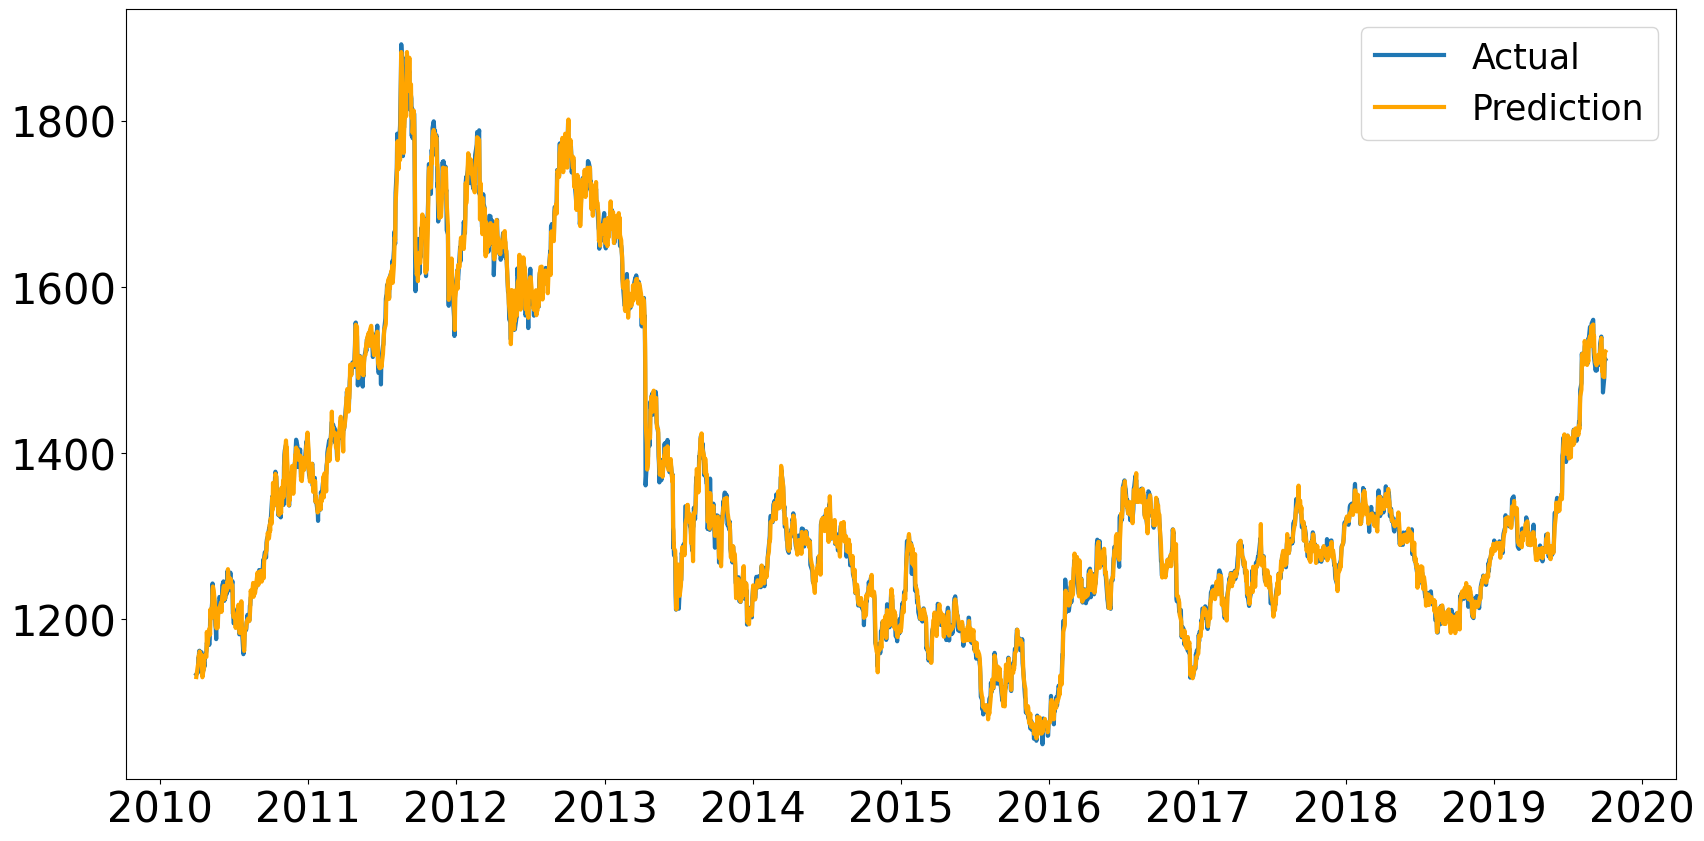

In [73]:
true_train = Y_train.copy()
prediction_train = best_model.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

#### **3.2.2. Valid set**

Metric:
Root Mean Square Error (RMSE): 61.0272069278004
Mean Absolute Percentage Error (MAPE): 2.0986892410350517
r2 score: 0.8169076502067969

Visualization:


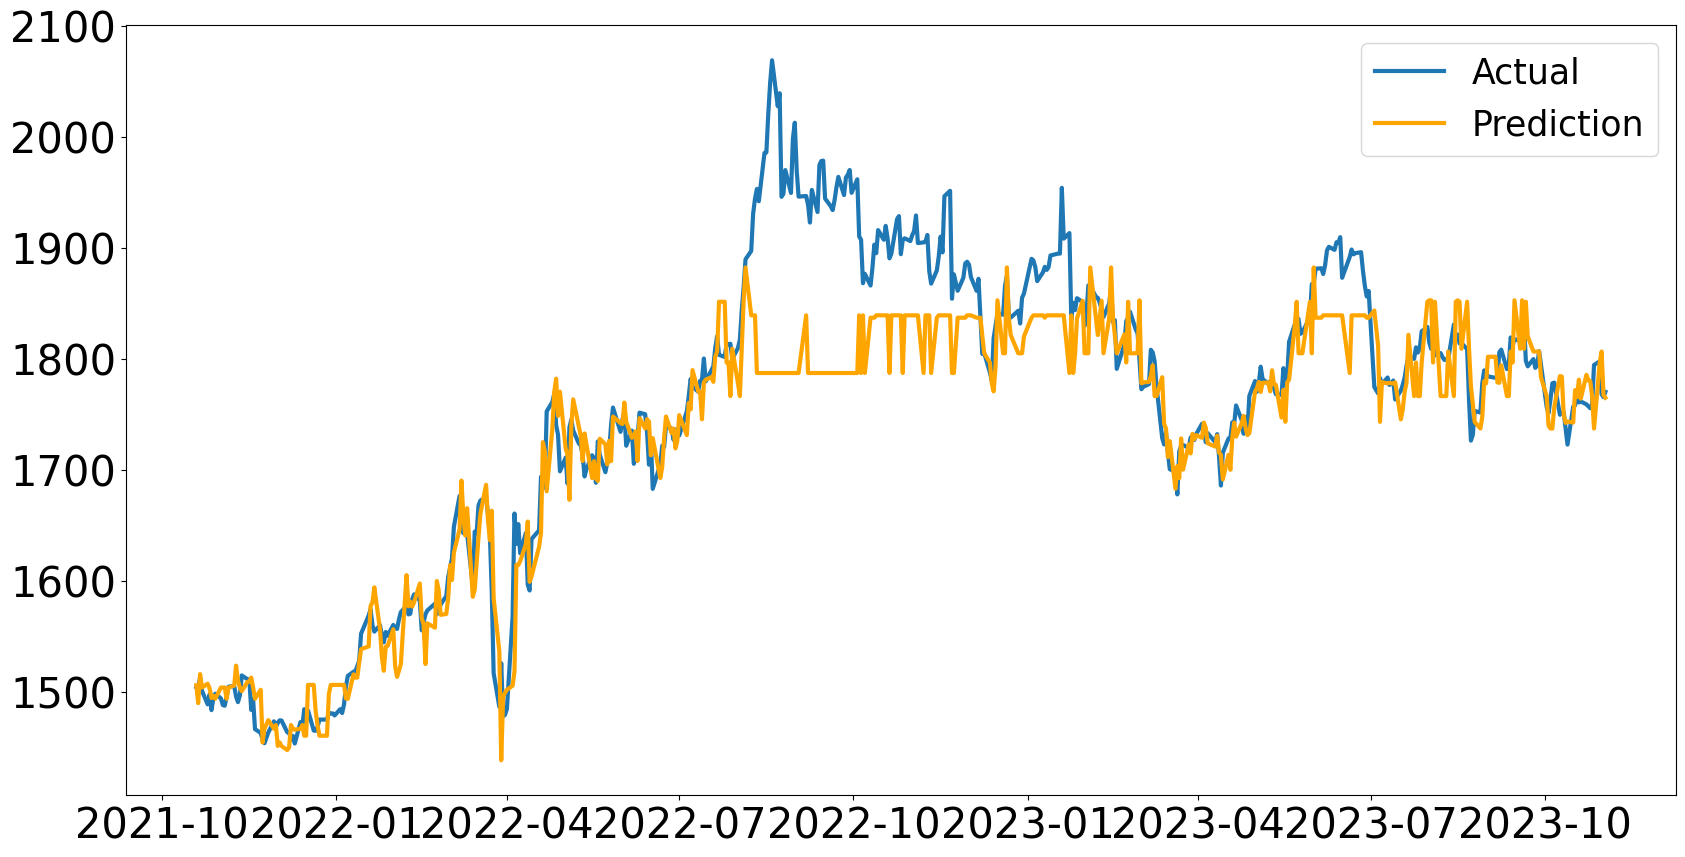

In [74]:
true_test = Y_valid.copy()
prediction_test = best_model.predict(X_valid)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

### **3.3. Evaluate the second model on the train and valid set**


In [75]:
second_model = KNN(
    n_neighbors = second_params['n_neighbors'],
    p = second_params['p']
)
best_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

#### **3.3.1. Train set**

Metric:
Root Mean Square Error (RMSE): 9.744285110469553
Mean Absolute Percentage Error (MAPE): 0.5176020249822282
r2 score: 0.9970152899833254

Visualization:


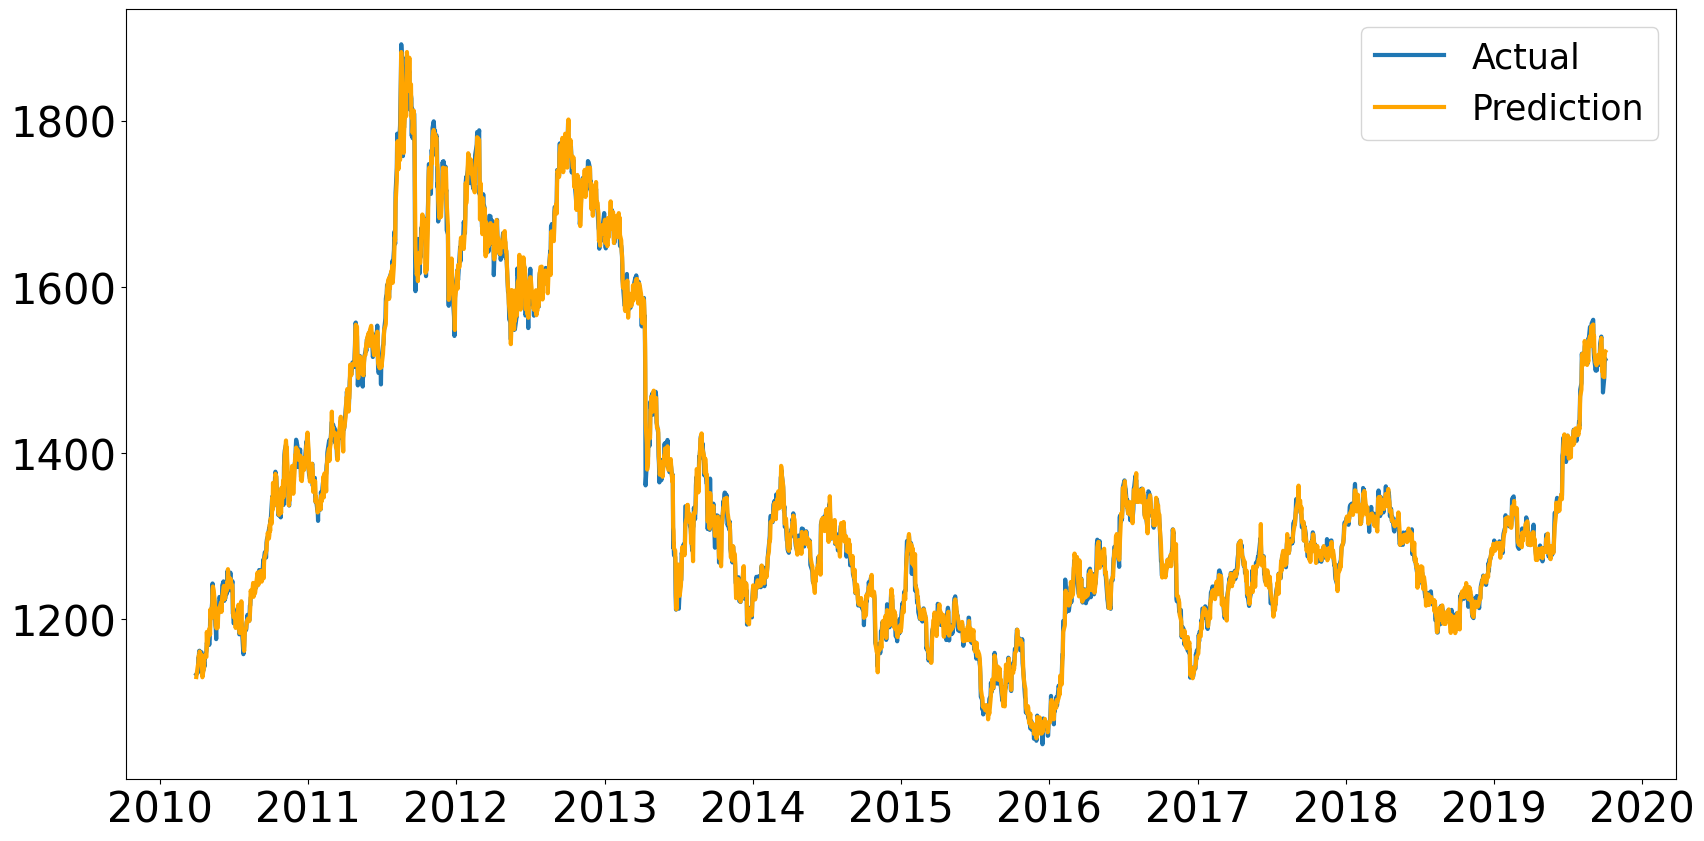

In [76]:
true_train = Y_train.copy()
prediction_train = best_model.predict(X_train)

print('Metric:')
metric(true_train, prediction_train)
print('Visualization:')
plot(true_train, prediction_train, train_date)

#### 3.3.2. **Valid set**

Metric:
Root Mean Square Error (RMSE): 61.0272069278004
Mean Absolute Percentage Error (MAPE): 2.0986892410350517
r2 score: 0.8169076502067969

Visualization:


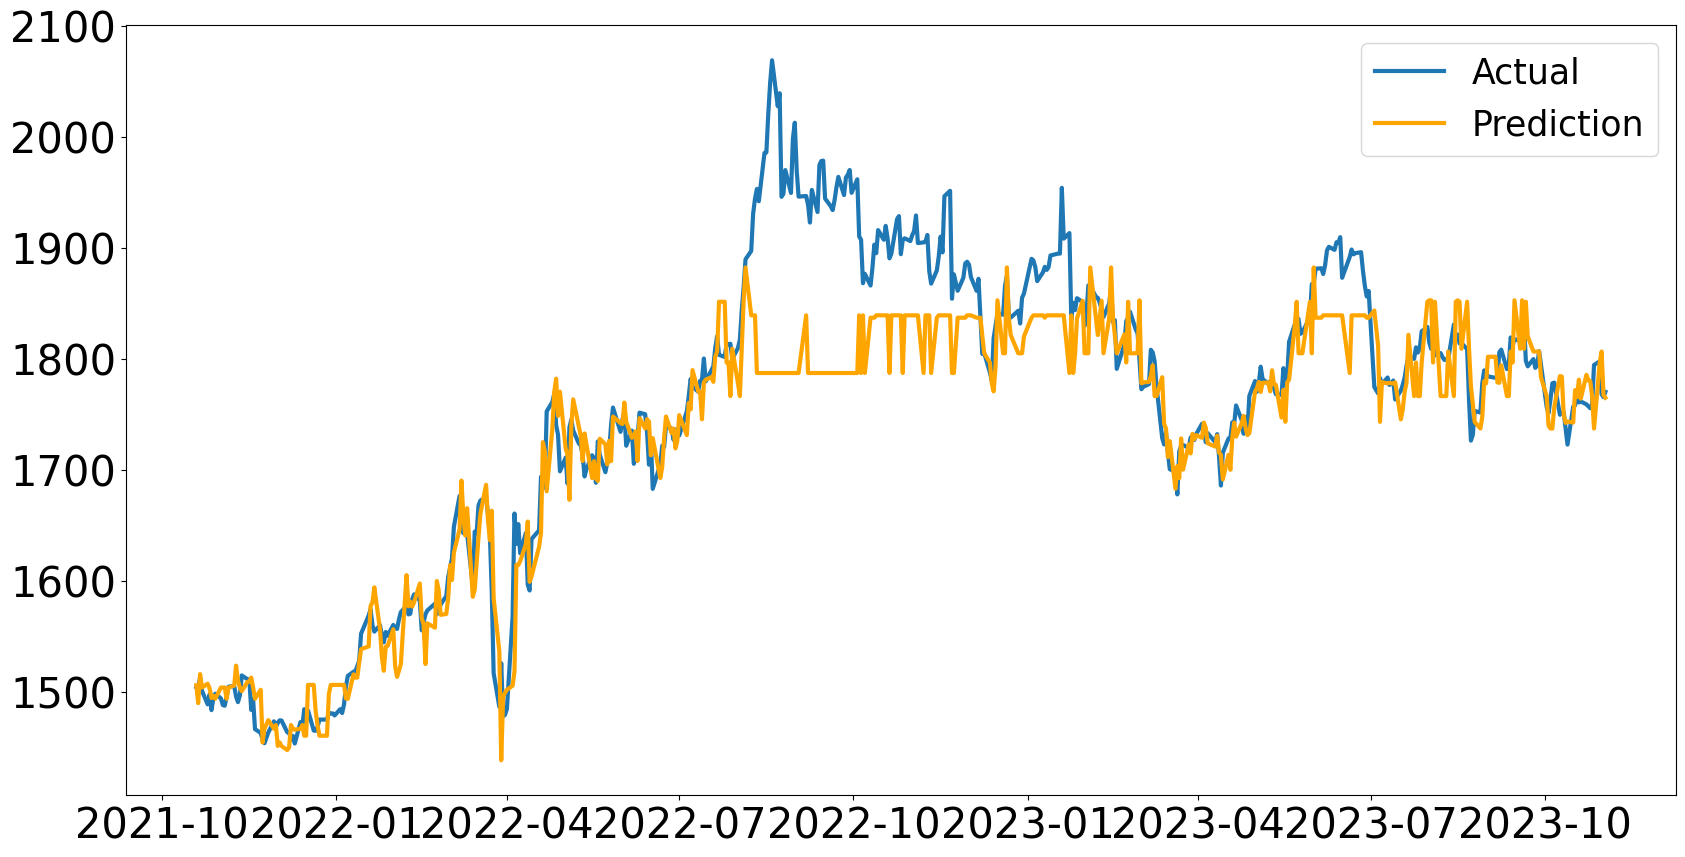

In [77]:
true_test = Y_valid.copy()
prediction_test = best_model.predict(X_valid)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)

# **4. Conclusion**

The default model is the best. I will test again on new train & test set.

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled, Y, test_size=0.15, random_state=0,shuffle=False)
train_date, test_date = train_test_split(df['Date'], test_size=0.15, random_state=0,shuffle=False)

In [79]:
knn = KNN()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

#### 4.1. Train

Metric:
Root Mean Square Error (RMSE): 13.80350330310351
Mean Absolute Percentage Error (MAPE): 0.674100872243762
r2 score: 0.996417372505037

Visualization:


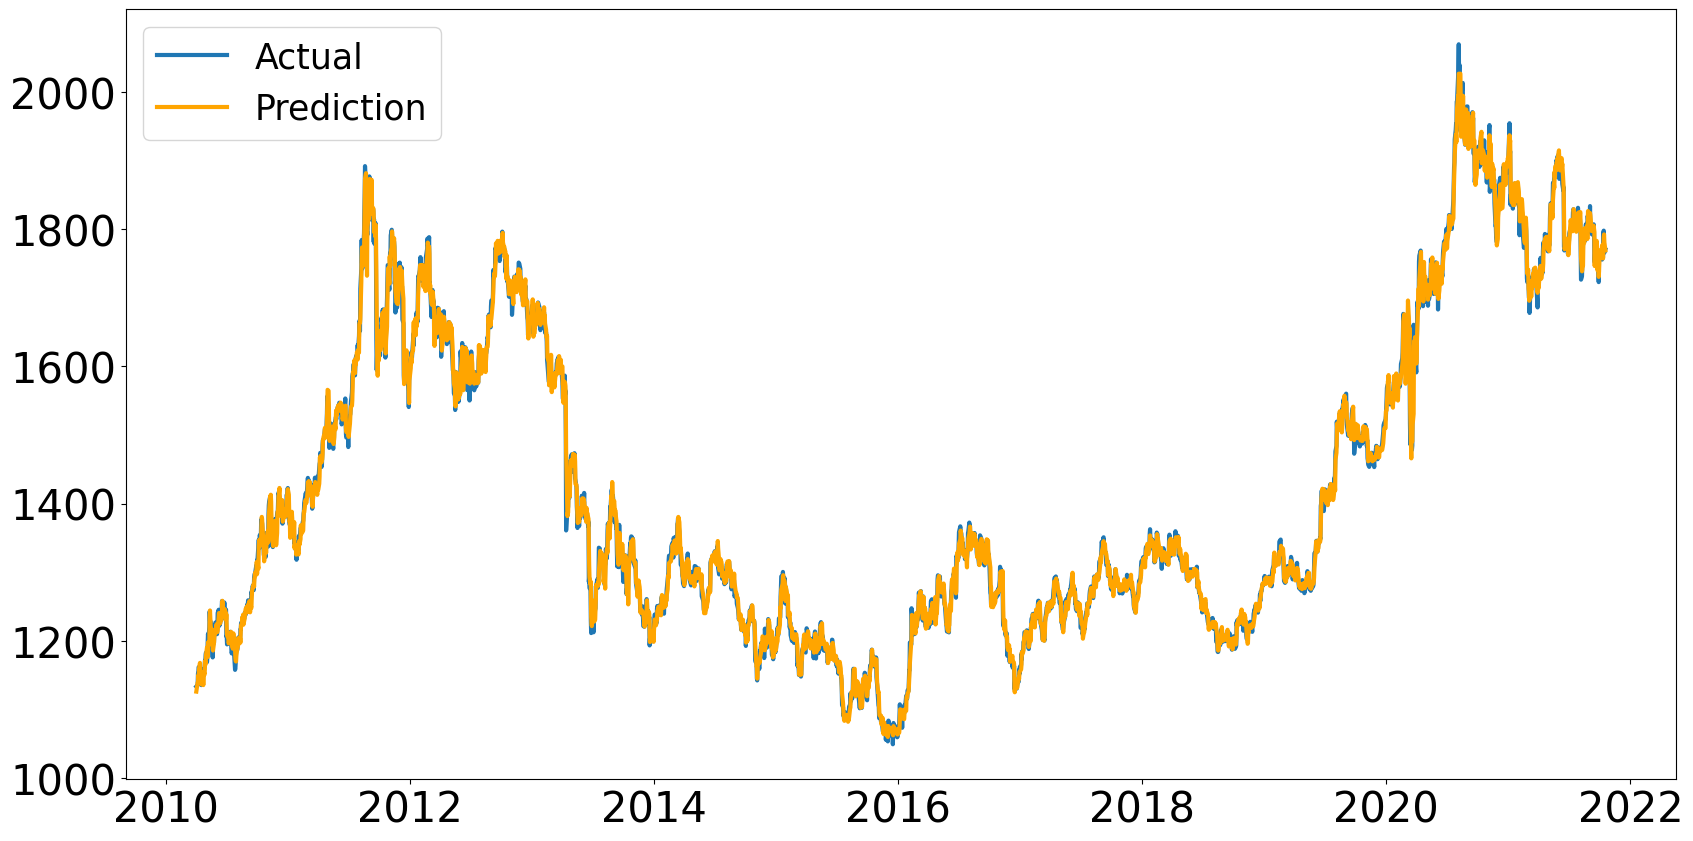

In [80]:
true_test = Y_train.copy()
prediction_test = knn.predict(X_train)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, train_date)

#### **4.2. Test**

Metric:
Root Mean Square Error (RMSE): 21.855890532594692
Mean Absolute Percentage Error (MAPE): 0.9189636904885736
r2 score: 0.9520556515593269

Visualization:


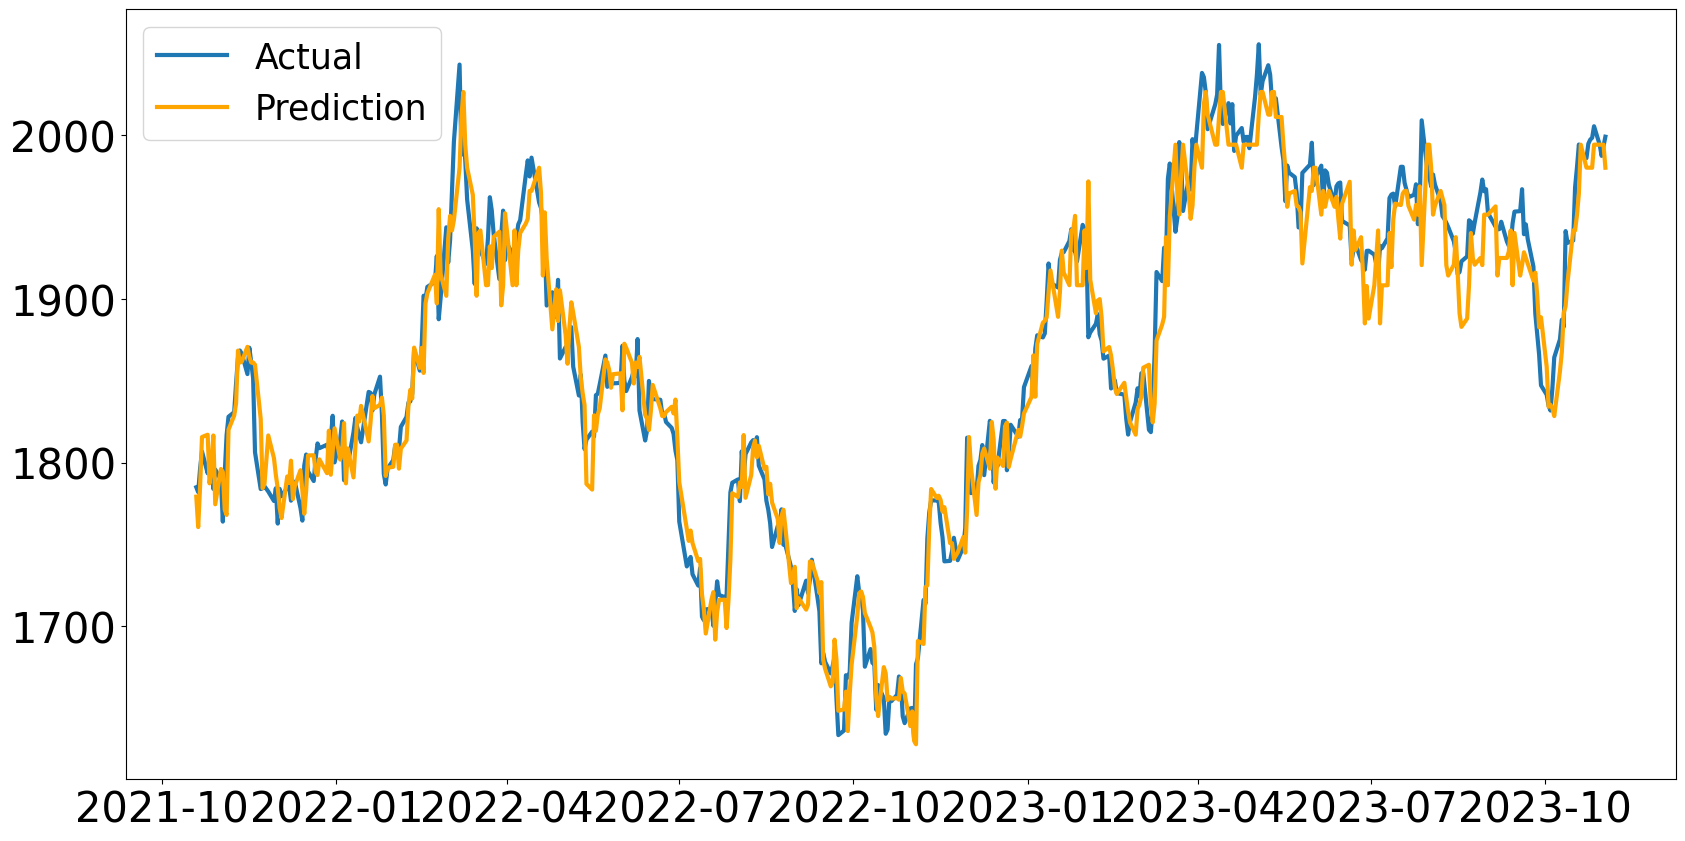

In [81]:
true_test = Y_test.copy()
prediction_test = knn.predict(X_test)
print('Metric:')
metric(true_test, prediction_test)
print('Visualization:')
plot(true_test, prediction_test, test_date)